In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
df = pd.read_csv("student_data.csv")
df.head()

,Hours_Studied,Attendance,Past_Grades,Final_Score
0,5,90,78,82
1,2,60,55,58
2,3,75,65,65
3,4,80,70,72
4,6,95,88,89


In [3]:
X = df.drop("Final_Score", axis=1)
y = df["Final_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
joblib.dump(model, "student_score_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

R² Score: 0.9962985504603445
Mean Squared Error: 1.4074761874539978


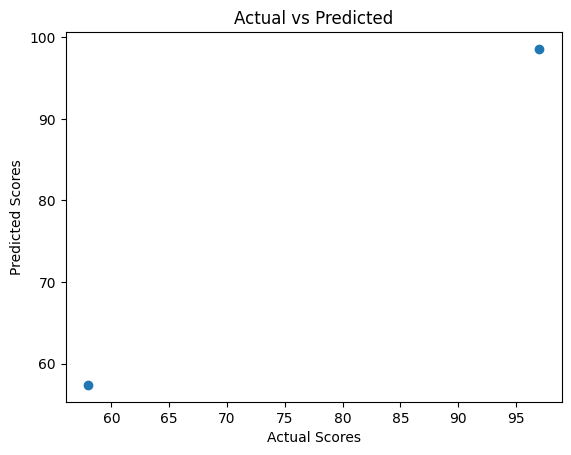

In [4]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted")
plt.show()

In [5]:
df_new = pd.read_csv("new_student_data.csv")
model = joblib.load("student_score_model.pkl")
scaler = joblib.load("scaler.pkl")
X_new = scaler.transform(df_new)
predictions = model.predict(X_new)
df_new["Predicted_Final_Score"] = predictions
df_new

,Hours_Studied,Attendance,Past_Grades,Predicted_Final_Score
0,6,92,85,87.295565
1,4,80,70,72.311933
2,7,95,90,92.931879


In [6]:
df_new.to_csv("predicted_scores.csv", index=False)
print("Predictions saved to predicted_scores.csv")

Predictions saved to predicted_scores.csv
